✅ Zapisano pliki: sos_clean.wav, sos_noisy.wav, sos_filtered.wav


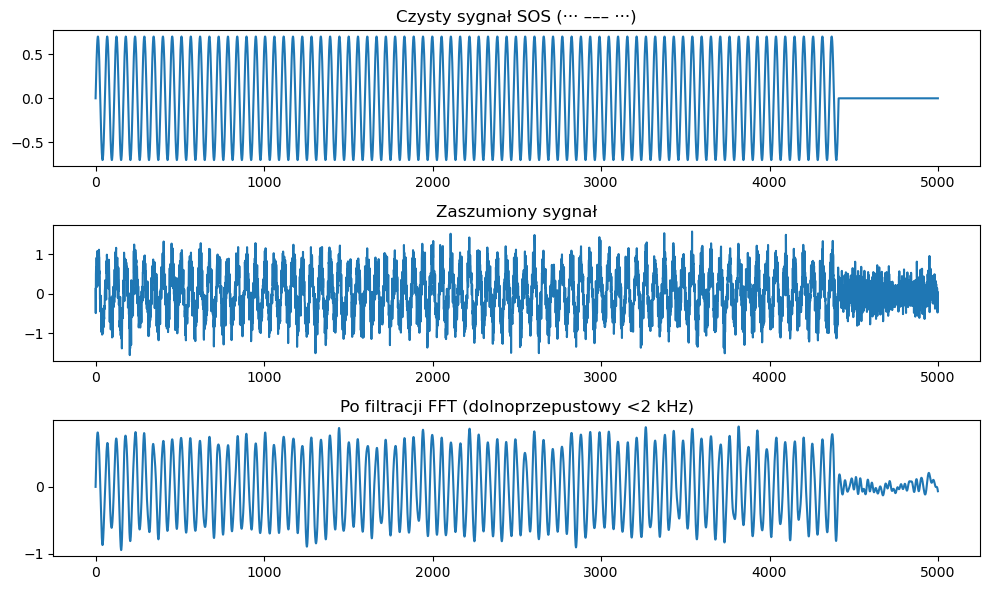

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from numpy.fft import fft, ifft, fftfreq

# ======================================================
# 1️⃣ Parametry sygnału
# ======================================================
fs = 44100         # częstotliwość próbkowania [Hz]
freq = 800         # częstotliwość tonu Morse’a [Hz]
dot = 0.1          # czas "kropki" [s]
dash = 3 * dot     # czas "kreski"
gap = dot          # odstęp między elementami w literze
pause = 3 * dot    # odstęp między literami

# ======================================================
# 2️⃣ Funkcja do generowania elementów Morse’a
# ======================================================
def tone(duration):
    t = np.linspace(0, duration, int(fs*duration), endpoint=False)
    return np.sin(2*np.pi*freq*t)

def silence(duration):
    return np.zeros(int(fs*duration))

# ======================================================
# 3️⃣ Sygnał SOS = ... --- ...
# ======================================================
signal = np.concatenate([
    tone(dot), silence(gap), tone(dot), silence(gap), tone(dot), silence(pause),  # S
    tone(dash), silence(gap), tone(dash), silence(gap), tone(dash), silence(pause), # O
    tone(dot), silence(gap), tone(dot), silence(gap), tone(dot)  # S
])

# normalizacja amplitudy
signal_clean = 0.7 * signal

# ======================================================
# 4️⃣ Dodanie szumu
# ======================================================
noise = 0.3 * np.random.normal(0, 1, len(signal_clean))
signal_noisy = signal_clean + noise

# ======================================================
# 5️⃣ Filtracja FFT – usunięcie wysokich częstotliwości
# ======================================================
yf = fft(signal_noisy)
xf = fftfreq(len(signal_noisy), 1/fs)

cutoff = 2000  # zostaw tylko do 2 kHz
mask = np.abs(xf) < cutoff
yf_filtered = yf * mask
signal_filtered = np.real(ifft(yf_filtered))

# ======================================================
# 6️⃣ Zapis do plików
# ======================================================
write("sos_clean.wav", fs, (signal_clean * 32767).astype(np.int16))
write("sos_noisy.wav", fs, (signal_noisy * 32767).astype(np.int16))
write("sos_filtered.wav", fs, (signal_filtered * 32767).astype(np.int16))

print("✅ Zapisano pliki: sos_clean.wav, sos_noisy.wav, sos_filtered.wav")

# ======================================================
# 7️⃣ Wizualizacja
# ======================================================
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(signal_clean[:5000])
plt.title("Czysty sygnał SOS (··· ––– ···)")

plt.subplot(3,1,2)
plt.plot(signal_noisy[:5000])
plt.title("Zaszumiony sygnał")

plt.subplot(3,1,3)
plt.plot(signal_filtered[:5000])
plt.title("Po filtracji FFT (dolnoprzepustowy <2 kHz)")

plt.tight_layout()
plt.show()





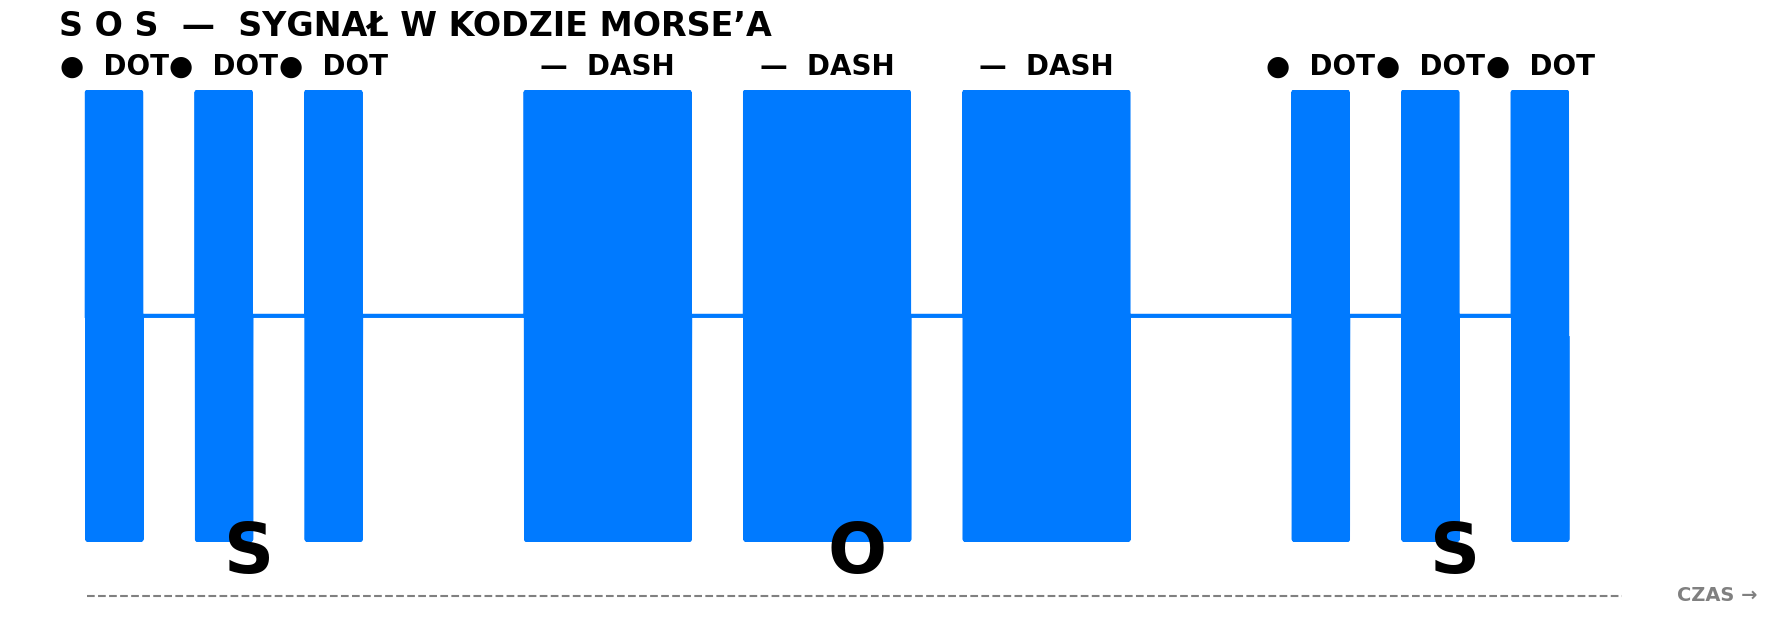

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# --- parametry SOS ---
fs = 44100
freq = 700
dot = 0.1
dash = 3 * dot
gap = dot
pause = 3 * dot

def tone(dur): return np.sin(2*np.pi*freq*np.linspace(0, dur, int(fs*dur), endpoint=False))
def silence(dur): return np.zeros(int(fs*dur))

# --- sekwencja SOS: ... --- ...
signal = np.concatenate([
    tone(dot), silence(gap), tone(dot), silence(gap), tone(dot), silence(pause),   # S
    tone(dash), silence(gap), tone(dash), silence(gap), tone(dash), silence(pause), # O
    tone(dot), silence(gap), tone(dot), silence(gap), tone(dot)                    # S
])
t = np.linspace(0, len(signal)/fs, len(signal))

# --- Rysowanie ---
plt.figure(figsize=(18,6))  # 🔹 większa figura
plt.plot(t, signal, color='#007AFF', lw=3)
plt.fill_between(t, 0, signal, color='#007AFF', alpha=0.3)
plt.ylim(-1.3, 1.3)
plt.axis("off")

# --- Tytuł ---
plt.text(-0.05, 1.25, "S O S  —  SYGNAŁ W KODZIE MORSE’A", fontsize=24, fontweight='bold', color='black')

# --- Sekcje i opisy ---
sections = [
    (0.0, 0.1, "·"), (0.2, 0.3, "·"), (0.4, 0.5, "·"),    # S
    (0.8, 1.1, "–"), (1.2, 1.5, "–"), (1.6, 1.9, "–"),    # O
    (2.2, 2.3, "·"), (2.4, 2.5, "·"), (2.6, 2.7, "·")     # S
]

# podpisy DOT / DASH nad sygnałem
for start, end, sym in sections:
    mid = (start + end) / 2
    if sym == "·":
        plt.text(mid, 1.05, "●  DOT", ha='center', va='bottom', fontsize=20, fontweight='bold', color='black')
    else:
        plt.text(mid, 1.05, "—  DASH", ha='center', va='bottom', fontsize=20, fontweight='bold', color='black')

# litery S i O pod sygnałem
plt.text(0.25, -1.15, "S", fontsize=50, fontweight='bold', color='black')
plt.text(1.35, -1.15, "O", fontsize=50, fontweight='bold', color='black')
plt.text(2.45, -1.15, "S", fontsize=50, fontweight='bold', color='black')

# linia czasu
plt.hlines(-1.25, 0, 2.8, color='gray', linewidth=1.5, linestyles='dashed')
plt.text(2.9, -1.25, "CZAS →", va='center', fontsize=14, fontweight='bold', color='gray')

plt.tight_layout(pad=0)
plt.show()


In [25]:
from IPython.display import Audio, display, HTML



display(HTML("<h3>🌫️ SOS — zaszumiony sygnał</h3>"))
display(Audio("sos_noisy.wav"))

display(HTML("<h3>✨ SOS — po filtracji FFT</h3>"))
display(Audio("sos_filtered.wav"))


display(HTML("<h3>🔊 SOS — czysty sygnał</h3>"))
display(Audio("sos_clean.wav"))
